In [48]:
% matplotlib inline
import pandas as pd

df = pd.read_csv("monteCarlo_inv.measure", delim_whitespace=True, header=1)

In [49]:
df.head()

,Monte_Carlo_index,pLH,pHL,tpdr,tpdf,tpd,trise,tfall,avg_power
0,1,4.351000e-11,1.176000e-11,43.51,11.76,27.63,2.929000e-11,1.389000e-11,0.000442
1,2,4.305000e-11,1.341000e-11,43.05,13.41,28.23,2.961000e-11,1.391000e-11,0.000428
2,3,4.242000e-11,1.308000e-11,42.42,13.08,27.75,2.950000e-11,1.392000e-11,0.000440
3,4,4.183000e-11,1.290000e-11,41.83,12.90,27.37,2.944000e-11,1.391000e-11,0.000452
4,5,4.012000e-11,1.701000e-11,40.12,17.01,28.56,3.029000e-11,1.397000e-11,0.000423


In [50]:
len(df)

1000

In [51]:
df.head()

,Monte_Carlo_index,pLH,pHL,tpdr,tpdf,tpd,trise,tfall,avg_power
0,1,4.351000e-11,1.176000e-11,43.51,11.76,27.63,2.929000e-11,1.389000e-11,0.000442
1,2,4.305000e-11,1.341000e-11,43.05,13.41,28.23,2.961000e-11,1.391000e-11,0.000428
2,3,4.242000e-11,1.308000e-11,42.42,13.08,27.75,2.950000e-11,1.392000e-11,0.000440
3,4,4.183000e-11,1.290000e-11,41.83,12.90,27.37,2.944000e-11,1.391000e-11,0.000452
4,5,4.012000e-11,1.701000e-11,40.12,17.01,28.56,3.029000e-11,1.397000e-11,0.000423


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Monte_Carlo_index    1000 non-null int64
pLH                  1000 non-null float64
pHL                  1000 non-null float64
tpdr                 1000 non-null float64
tpdf                 1000 non-null float64
tpd                  1000 non-null float64
trise                1000 non-null float64
tfall                1000 non-null float64
avg_power            1000 non-null float64
dtypes: float64(8), int64(1)
memory usage: 70.4 KB


In [53]:
df.drop('Monte_Carlo_index', axis=1, inplace=True)
df.head()

,pLH,pHL,tpdr,tpdf,tpd,trise,tfall,avg_power
0,4.351000e-11,1.176000e-11,43.51,11.76,27.63,2.929000e-11,1.389000e-11,0.000442
1,4.305000e-11,1.341000e-11,43.05,13.41,28.23,2.961000e-11,1.391000e-11,0.000428
2,4.242000e-11,1.308000e-11,42.42,13.08,27.75,2.950000e-11,1.392000e-11,0.000440
3,4.183000e-11,1.290000e-11,41.83,12.90,27.37,2.944000e-11,1.391000e-11,0.000452
4,4.012000e-11,1.701000e-11,40.12,17.01,28.56,3.029000e-11,1.397000e-11,0.000423


* **Rising propagation delay (LH)**: da entrada à saída "crescente" atingindo VDD/2.

In [54]:
df['pLH'].describe()

count    1.000000e+03
mean     4.203881e-11
std      1.974352e-12
min      3.660000e-11
25%      4.067000e-11
50%      4.208500e-11
75%      4.336250e-11
max      4.837000e-11
Name: pLH, dtype: float64

Média e mediana extremamente próximas sugere uma distribuição normal.

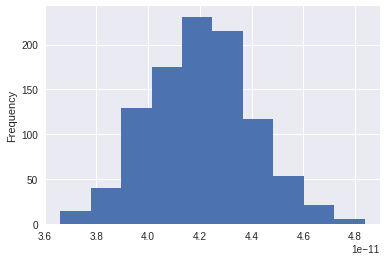

In [55]:
df.pLH.sort_values().plot(kind='hist')

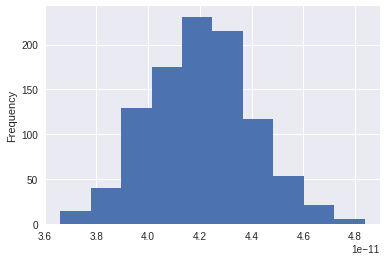

In [56]:
import seaborn as sns

df.pLH.plot(kind='hist')

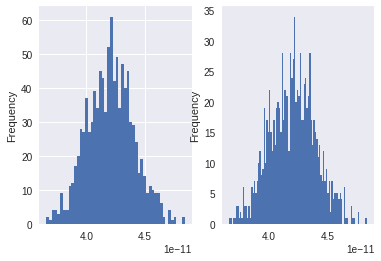

In [57]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, squeeze=False)

df.pLH.plot(kind='hist', bins=50, ax=axes[0,0])
df.pLH.plot(kind='hist', bins=100, ax=axes[0,1])
plt.grid()

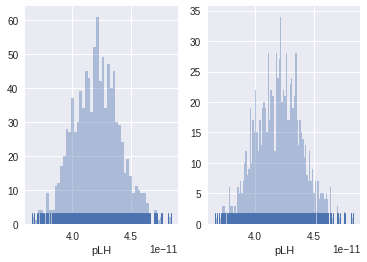

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, squeeze=False)

sns.distplot(df.pLH, kde=False, rug=True, bins=50, ax=axes[0,0])
sns.distplot(df.pLH, kde=False, rug=True, bins=100, ax=axes[0,1])

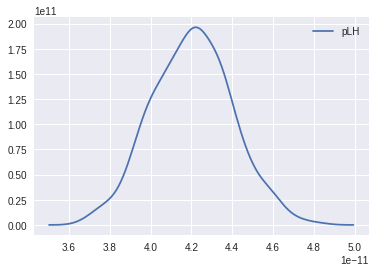

In [59]:
import seaborn as sns

sns.kdeplot(df['pLH'])

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff61ce577b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff61ce577b8>)

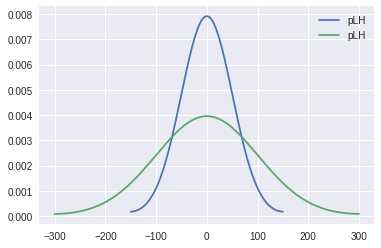

In [60]:
import seaborn as sns

sns.kdeplot(df['pLH'], bw = 50), sns.kdeplot(df['pLH'], bw = 100)

{'boxes': [<matplotlib.lines.Line2D at 0x7ff61cc93d68>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff61cca6c18>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff61ccb8908>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff61ccb07b8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff61cc9c8d0>,
  <matplotlib.lines.Line2D at 0x7ff61cc9cac8>]}

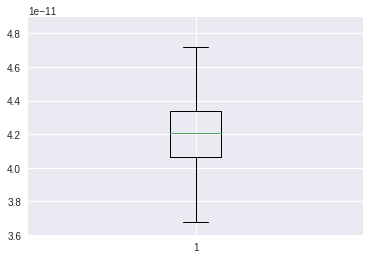

In [61]:
plt.boxplot(df['pLH'])

* **Fall propagation delay (HL)**: da entrada à saída "decrescente" atingindo VDD/2.

In [62]:
df['pHL'].describe()

count    1.000000e+03
mean     1.320530e-11
std      1.719851e-12
min      7.267000e-12
25%      1.205500e-11
50%      1.321000e-11
75%      1.439250e-11
max      1.978000e-11
Name: pHL, dtype: float64

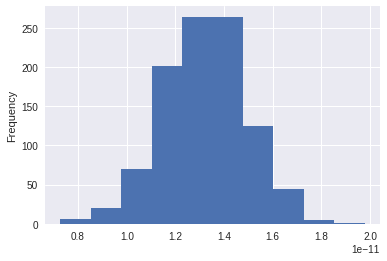

In [63]:
df.pHL.sort_values().plot(kind='hist')

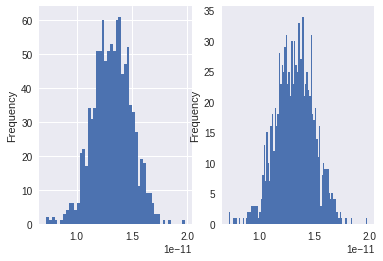

In [66]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, squeeze=False)

df.pHL.plot(kind='hist', bins=50, ax=axes[0,0])
df.pHL.plot(kind='hist', bins=100, ax=axes[0,1])
plt.grid()

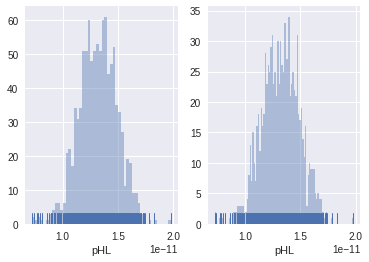

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, squeeze=False)

sns.distplot(df.pHL, kde=False, rug=True, bins=50, ax=axes[0,0])
sns.distplot(df.pHL, kde=False, rug=True, bins=100, ax=axes[0,1])

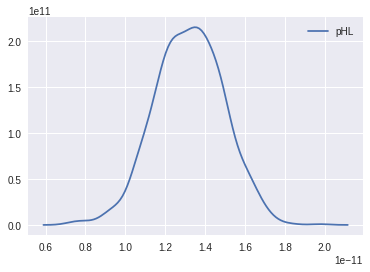

In [70]:
import seaborn as sns

sns.kdeplot(df['pHL'])

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff617881588>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff617881588>)

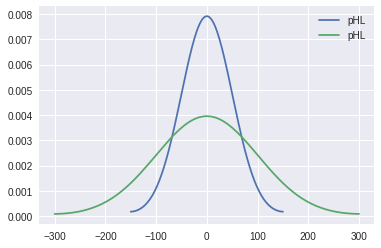

In [73]:
import seaborn as sns

sns.kdeplot(df['pHL'], bw = 50), sns.kdeplot(df['pHL'], bw = 100)

{'boxes': [<matplotlib.lines.Line2D at 0x7ff617591550>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff61759bfd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff6175ab940>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff6175a3a58>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff617591ef0>,
  <matplotlib.lines.Line2D at 0x7ff61759b780>]}

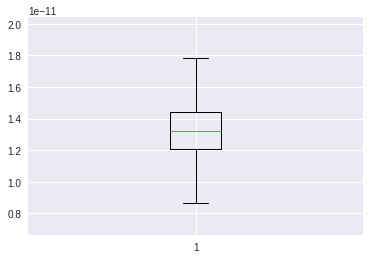

In [75]:
plt.boxplot(df['pHL'])

* **Rise Time**: da saída para atingir de 0.2VDD para 0.8VDD

In [76]:
df.trise.describe()

count    1.000000e+03
mean     2.956363e-11
std      2.906172e-13
min      2.874000e-11
25%      2.936000e-11
50%      2.955000e-11
75%      2.975000e-11
max      3.087000e-11
Name: trise, dtype: float64

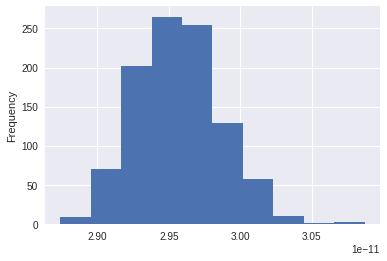

In [78]:
df.trise.sort_values().plot(kind='hist')

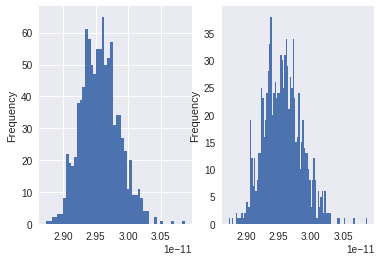

In [80]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, squeeze=False)

df.trise.plot(kind='hist', bins=50, ax=axes[0,0])
df.trise.plot(kind='hist', bins=100, ax=axes[0,1])
plt.grid()

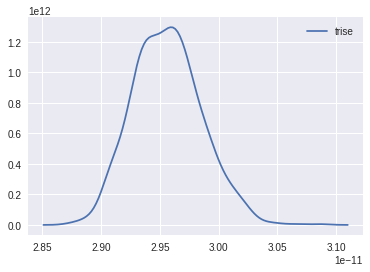

In [81]:
import seaborn as sns

sns.kdeplot(df['trise'])

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff616a33a58>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff616a33a58>)

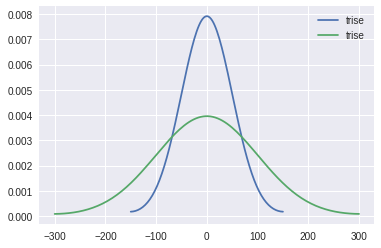

In [87]:
sns.kdeplot(df['trise'], bw = 50), sns.kdeplot(df['trise'], bw = 100)

{'boxes': [<matplotlib.lines.Line2D at 0x7ff61689f978>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff6168aada0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff6168b9d68>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff6168b2e80>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff61689fb70>,
  <matplotlib.lines.Line2D at 0x7ff6168aaba8>]}

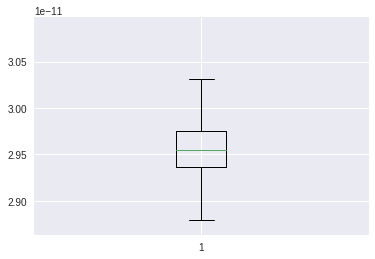

In [89]:
plt.boxplot(df['trise'])

* **Fall Time**: da saída para atingir de 0.8VDD para 0.2VDD

In [91]:
df.tfall.describe()

count    1.000000e+03
mean     1.391844e-11
std      5.824740e-14
min      1.379000e-11
25%      1.388000e-11
50%      1.392000e-11
75%      1.395000e-11
max      1.418000e-11
Name: tfall, dtype: float64

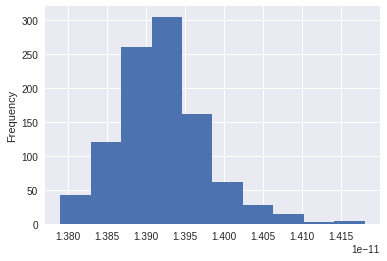

In [92]:
df.tfall.sort_values().plot(kind='hist')

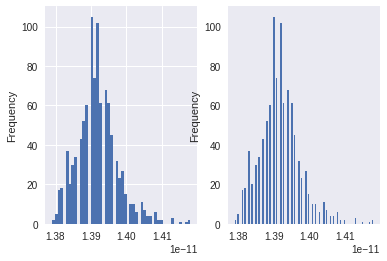

In [93]:
fig, axes = plt.subplots(nrows=1, ncols=2, squeeze=False)

df.tfall.plot(kind='hist', bins=50, ax=axes[0,0])
df.tfall.plot(kind='hist', bins=100, ax=axes[0,1])
plt.grid()

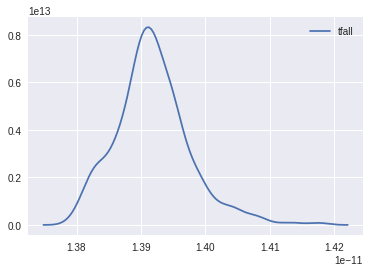

In [95]:
sns.kdeplot(df['tfall'])

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff616f41a20>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff616f41a20>)

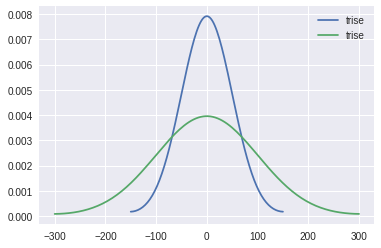

In [97]:
sns.kdeplot(df['trise'], bw = 50), sns.kdeplot(df['trise'], bw = 100)

{'boxes': [<matplotlib.lines.Line2D at 0x7ff6173a8f28>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff617224cf8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff617217358>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff61740d048>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff6173a8be0>,
  <matplotlib.lines.Line2D at 0x7ff617224b00>]}

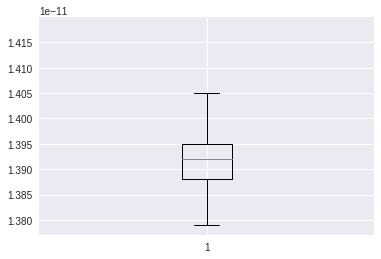

In [99]:
plt.boxplot(df.tfall)

* **Average propagation delay**

In [102]:
df.tpd.describe()

count    1000.000000
mean       27.622050
std         0.632682
min        25.930000
25%        27.187500
50%        27.580000
75%        28.032500
max        30.260000
Name: tpd, dtype: float64

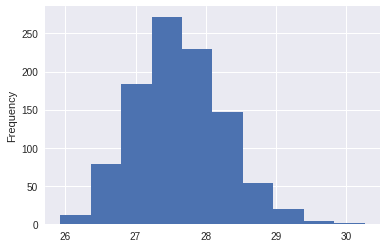

In [104]:
df.tpd.plot(kind='hist')

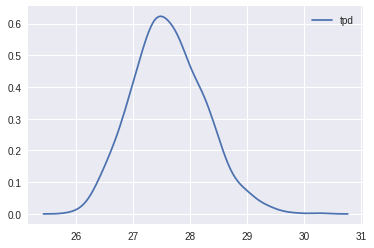

In [105]:
sns.kdeplot(df['tpd'])